In [5]:
%%capture
%pip install -U 'rockfish[labs]' -f 'https://docs142.rockfish.ai/packages/index.html'

In [1]:
import pandas as pd
import random

import rockfish as rf
import rockfish.labs as rl

In [2]:
def generate_data(num_rows, rng):
    numerical_1 = [rng.uniform(1, 100) for _ in range(num_rows)]
    numerical_2 = [rng.random() * 10 for _ in range(num_rows)]
    categorical_1 = rng.choices(["A", "B", "C"], weights=[1, 1, 2], k=num_rows)
    categorical_2 = rng.choices(["X", "Y", "Z"], weights=[1, 2, 3], k=num_rows)

    data = {
        "numerical_1": numerical_1,
        "numerical_2": numerical_2,
        "categorical_1": categorical_1,
        "categorical_2": categorical_2,
    }
    return pd.DataFrame(data)

rng = random.Random(42)
data = rf.Dataset.from_pandas("sample1", generate_data(100, rng))
syn = rf.Dataset.from_pandas("sample2", generate_data(100, rng))

### Overall Fidelity Score

In [3]:
# get the default weighted average score on marginal distribution
rl.metrics.marginal_dist_score(dataset=data, syn=syn)

0.9299999999999999

### Mechanisms Across Different Perspectives

[Individual field measurement](#individual)

[Correlation measurement](#correlation)

[Association measurement](#association)

Session length measurement<a id="session_length"></a>

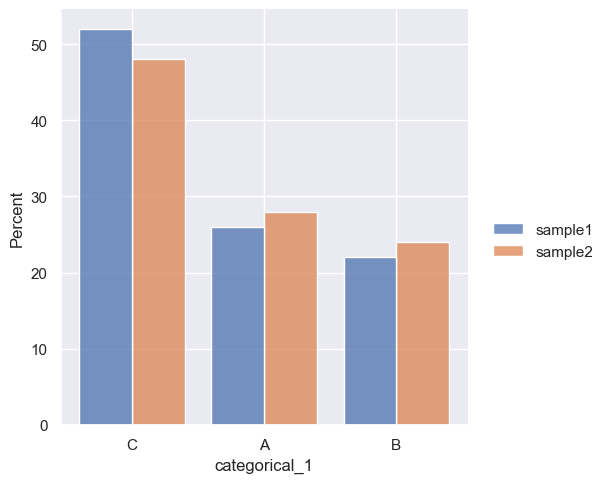

In [6]:
# categorical fields - field 1
rf.labs.vis.plot_bar([data, syn], "categorical_1");

In [7]:
# compute the similarity on the distribution of the categorical field
# TV distance ranges between 0 and 1, the lower the better
rl.metrics.tv_distance(data, syn, "categorical_1")

0.04000000000000002

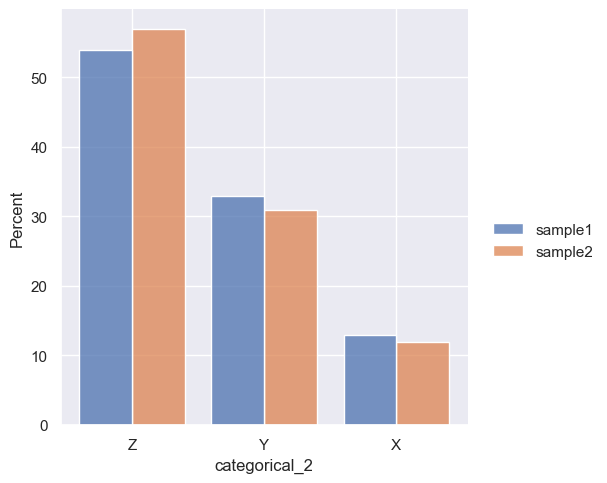

In [8]:
# categorical fields - field 2
rf.labs.vis.plot_bar([data, syn], "categorical_2");

In [9]:
# compute the similarity on the distribution of the categorical field
# TV distance ranges between 0 and 1, the lower the better
rl.metrics.tv_distance(data, syn, "categorical_2")

0.02999999999999997

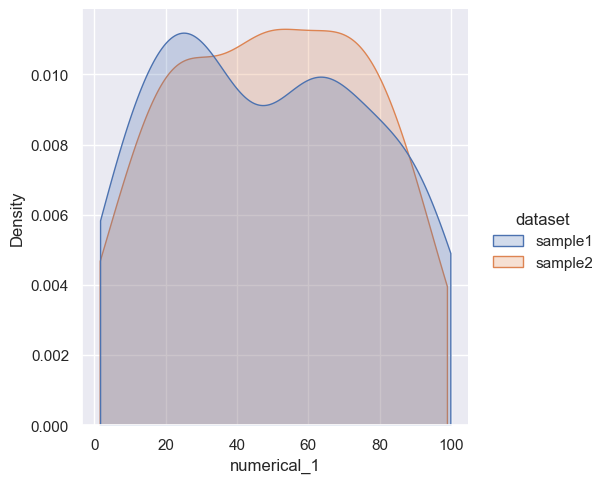

In [10]:
# numerical fields - field 1
rf.labs.vis.plot_kde([data, syn], "numerical_1");

In [11]:
# compute the similarity on the distribution of the numerical field
# KS distance ranges between 0 and 1, the lower the better
rl.metrics.ks_distance(data, syn, "numerical_1")

0.10999999999999999

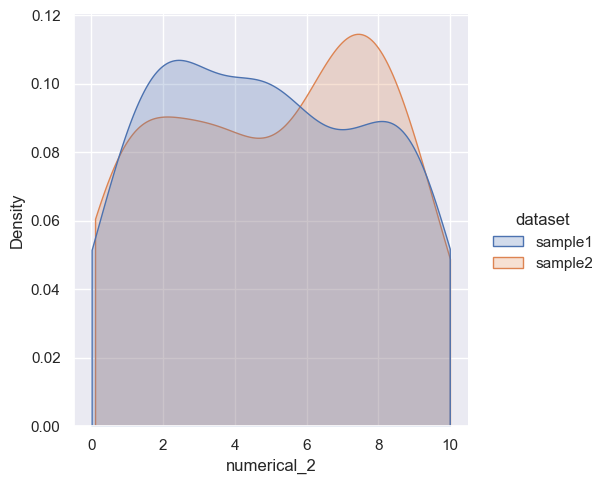

In [12]:
# numerical fields - field 2
rf.labs.vis.plot_kde([data, syn], "numerical_2");

In [13]:
# compute the similarity on the distribution of the numerical field
# KS distance ranges between 0 and 1, the lower the better
rl.metrics.ks_distance(data, syn, "numerical_2")

0.09999999999999998

Correlation measurement<a id="correlation"></a>

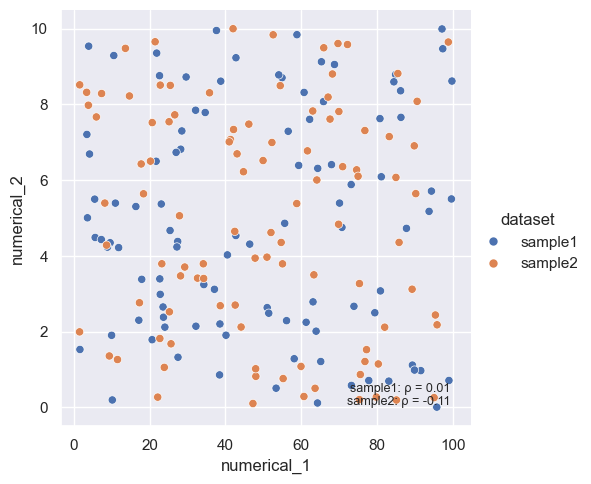

In [14]:
# correlation
rl.vis.plot_correlation([data, syn], "numerical_1", "numerical_2");

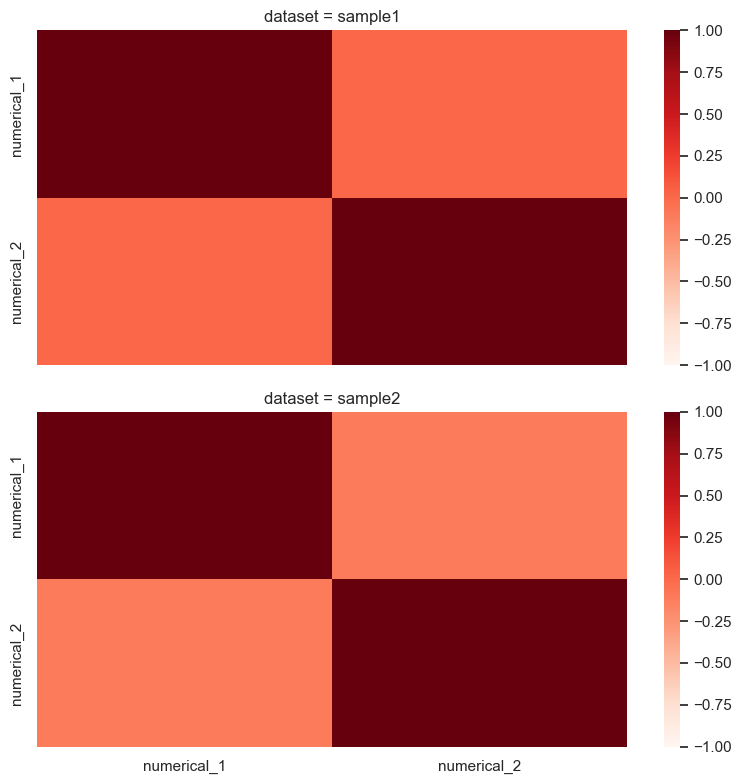

In [16]:
rl.vis.plot_correlation_heatmap([data, syn], ["numerical_1", "numerical_2"]);

In [14]:
rl.metrics.correlation_score(data, syn, ["numerical_1", "numerical_2"])

0.887903531206751

Association measurement<a id="association"></a>

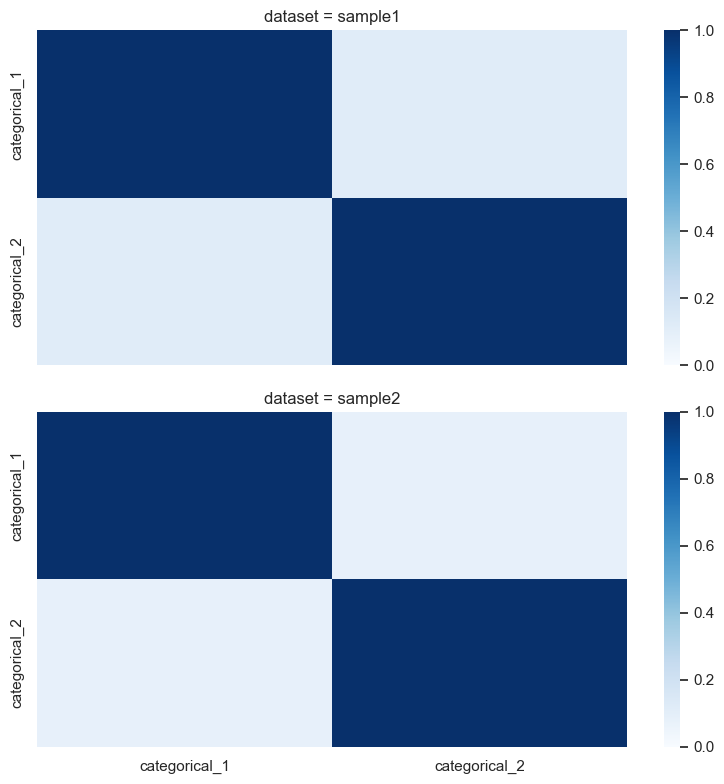

In [15]:
rl.vis.plot_association_heatmap([data, syn], ["categorical_1", "categorical_2"]);

In [16]:
rl.metrics.association_score(data, syn, ["categorical_1", "categorical_2"])

0.9687617372669125